## Week 10 Instructor Lab Winston Caton

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

# modules for plotting trees
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [5]:
# set working directory
os.chdir("c:\\Users\\winst\\OneDrive\\Desktop\\Python 2\\Week 10\\week10labs\\data")  # change this to your filepath
os.getcwd()  # confirm change

'c:\\Users\\winst\\OneDrive\\Desktop\\Python 2\\Week 10\\week10labs\\data'

In [6]:
# load data
hospitals = pd.read_csv("calihospital.txt", sep='\t')
hospitals

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,1.361567e+05,3.344754e+07,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,1.970943e+05,3.725418e+07,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,1.391704e+05,2.338557e+07,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,1.167978e+05,1.368450e+07,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,32930,Scripps Mercy Hospital,92103,www.scrippshealth.org,Non Profit,Teaching,Alumni,2814.0,1.321032e+06,3.791029e+08,...,530,411280,Manin,Emily,F,1,Regional Representative,46978,4,1/1/2011
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,www.memorialcare.org,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,...,462,310431,Dong,HongWei,F,4,Safety Inspection Member,23987,2,1/1/2012
58,22460,Stanford Hospital & Clinics,94305,stanfordhospital.org,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,...,445,380668,Smith,Mary,F,4,Safety Inspection Member,23987,2,1/1/2012
59,33192,California Pacific Medical Center - Pacific Ca...,94115,www.cpmc.org,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,...,730,308150,Fourier,Craig,M,1,Regional Representative,46978,4,1/1/2011


## Principal Component Analysis (PCA) in Python


In [8]:
# keep only desired with numbers
pca_data = (hospitals
            .filter([
                'NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds'
            ]))

# get scaling function
scaler = preprocessing.StandardScaler()

# run the PCA - we specify 15 components because we have 15 variables in the DataFrame
pca_result = pca(n_components=7).fit(scaler.fit_transform(pca_data))



# obtain eigenvalues - focus on the output
pca_result.explained_variance_

array([5.72134563e+00, 1.07657967e+00, 1.91383827e-01, 9.31699632e-02,
       3.29143500e-02, 1.27322677e-03, 5.91419641e-22])

Based on these Eigenvalues, we would keep only the 2 first components, as the rest are less than 1

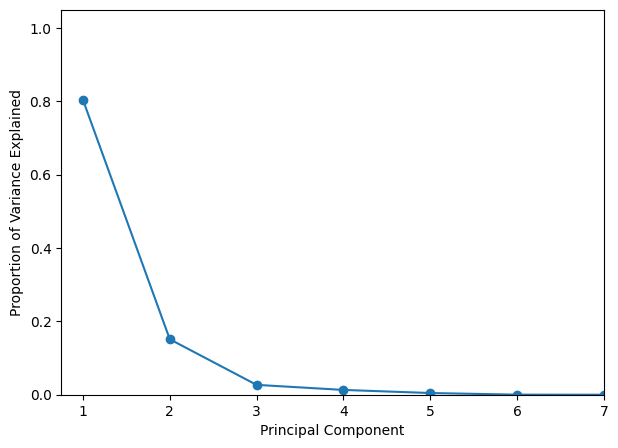

In [9]:
# Generate Scree Plot

plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7])

plt.show()

This plot matches our result of using 2 variables, as the third variable is where the plot levels off.

## Clustering in Python



In [11]:
# subset numerical variables and categorical variables
clust_data = (hospitals
              .filter([
                  'NoFTE','NetPatRev','InOperExp','OutOperExp','OperRev','OperInc','AvlBeds',  # numerical
                  'Teaching', 'TypeControl', 'DonorType'                                       # categorical
              ]))

# inspect unique values for categorical variables
print(hospitals['Teaching'].unique())
print(hospitals['TypeControl'].unique())
print(hospitals['DonorType'].unique())

['Small/Rural' 'Teaching']
['District' 'Non Profit' 'Investor' 'City/County']
['Charity' 'Alumni']


In [12]:
le = preprocessing.LabelEncoder()

In [13]:
km = cls.KMeans(n_clusters=2).fit(pca_data)
km.labels_

clust_data['Teaching'] = le.fit_transform(clust_data['Teaching'])

cm1 = metcs.confusion_matrix(clust_data.Teaching, km.labels_)
print(cm1)

[[44  0]
 [ 9  8]]


In [14]:
clust_data.TypeControl.unique()

km2 = cls.KMeans(n_clusters=4).fit(pca_data)
km2.labels_

clust_data['TypeControl'] = le.fit_transform(clust_data['TypeControl'])

cm2 = metcs.confusion_matrix(clust_data.TypeControl, km2.labels_)
print(cm2)

[[ 3  0  2  2]
 [ 0  0 14  0]
 [ 0  0  3  0]
 [ 4  3 27  3]]


In [15]:
clust_data.DonorType.unique()

km3 = cls.KMeans(n_clusters=2).fit(pca_data)
km3.labels_

clust_data['DonorType'] = le.fit_transform(clust_data['DonorType'])

cm3 = metcs.confusion_matrix(clust_data.DonorType, km3.labels_)
print(cm3)

[[ 9  8]
 [ 0 44]]


Both Donortype and Teaching perform similarly, based on their confusion matrix.  We will go with Teaching for our selection to graph the confusion matrix as it performs slightly better than Donortype.

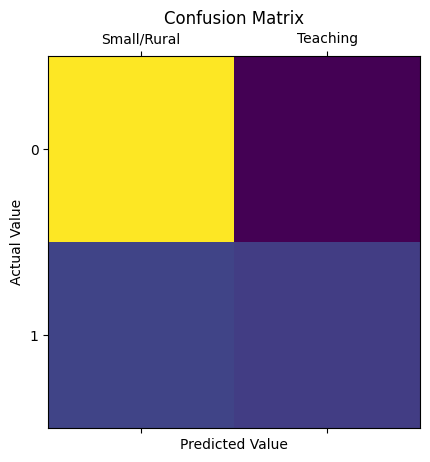

In [16]:
##Confusion Matrix

# color-based chart
plt.matshow(cm1)
plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.xticks([0,1], ['Small/Rural','Teaching'])

plt.show()